REGRESION MULTIVARIABLE

In [136]:
# utilizado para manejos de directorios y rutas
import os

# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

# Biblioteca para la manipulación y el análisis de datos
import pandas as pd


In [137]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [138]:
# Cargamos el dataset
data = pd.read_csv('/content/gdrive/MyDrive/bodyfat.csv', delimiter=',')

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [140]:
# Seleccionamos las columnas independientes (X) y dependiente(y)
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
m = y.size

In [141]:
print(X.head())

   BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


In [142]:
display(data)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [143]:
# Funcion de normalizacion de caracteristicas, para mejorar el rendimiento
def  featureNormalize(X):
    # una copia de X para almacenar los datos normalizados
    X_norm = X.copy()
    # vector donde se almacenara la media de cada caracteristica
    mu = np.zeros(X.shape[1])
    # vector donde se almacenara la desviacion estandar de cada caracteristica
    sigma = np.zeros(X.shape[1])

    # calcular la media de cada caracteristica
    mu = np.mean(X, axis = 0)

    sigma = np.std(X, axis = 0)

    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [144]:
# Llama a la funcion featureNormalize con el parametro X para obtener los datos normalizados
X_norm, mu, sigma = featureNormalize(X)

print('Media calculada:\n', mu)
print('Desviación estandar calculada:\n', sigma)
print(X_norm)

Media calculada:
 BodyFat     19.150794
Age         44.884921
Weight     178.924405
Height      70.148810
Neck        37.992063
Chest      100.824206
Abdomen     92.555952
Hip         99.904762
Thigh       59.405952
Knee        38.590476
Ankle       23.102381
Biceps      32.273413
Forearm     28.663889
Wrist       18.229762
dtype: float64
Desviación estandar calculada:
 BodyFat     8.352119
Age        12.577011
Weight     29.330790
Height      3.655581
Neck        2.426085
Chest       8.413732
Abdomen    10.761661
Hip         7.149829
Thigh       5.239525
Knee        2.407015
Ankle       1.691527
Biceps      3.015273
Forearm     2.016678
Wrist       0.931731
dtype: float64
      BodyFat       Age    Weight    Height      Neck     Chest   Abdomen  \
0   -0.820246 -1.740073 -0.841246 -0.656205 -0.738665 -0.918048 -0.683533   
1   -1.562573 -1.819583 -0.193462  0.574790  0.209365 -0.858621 -0.887963   
2    0.736245 -1.819583 -0.849769 -1.066536 -1.645475 -0.597144 -0.432643   
3   -1.047

In [145]:
# añadimos una columna de unos como primera columna en X
# el termino de sesgo es un valor constante que se añade
# a la ecuación de predicción para ajustar la línea de
# regresión de manera que se alinee mejor con los datos observados
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [146]:
# Esta funcion calcula el costo, el costo mide la diferencia entre las predicciones realizadas por el modelo y los
# valores reales observados en los datos.
def computeCostMulti(X, y, theta):
    # almacenamos en m la cantidad de filas que tiene y
    m = y.shape[0]
    # variable que almacenara el valor del costo
    J = 0
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

In [147]:
# Funcion descenso de la gradiente, ajusta los parametros theta del modelo de regresion de manera que se minimice la funcion de costo
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # almacenamos en m la cantidad de filas que tiene y
    m = y.shape[0]
    # se realiza una copia de theta para evitar modificar el vector original fuera de la funcion
    # las thetas son los parametros o coeficientes que determinan la relacion entre variables dependientes e independientes
    # Este valor representa cuánto cambia el precio de la casa por cada unidad adicional de tamaño.
    # Si 𝜃1 es positivo, significa que a medida que aumenta el tamaño de la casa, también aumenta el precio.
    # el objetivo es encontrar una relación lineal entre las características de entrada y la salida
    theta = theta.copy()
    # una lista que almacenara el valor de la funcion de costo en cada iteracion
    J_history = []
    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        # Después de actualizar theta, se calcula el costo actual con computeCostMulti y se guarda en J_history.
        J_history.append(computeCostMulti(X, y, theta))
    return theta, J_history

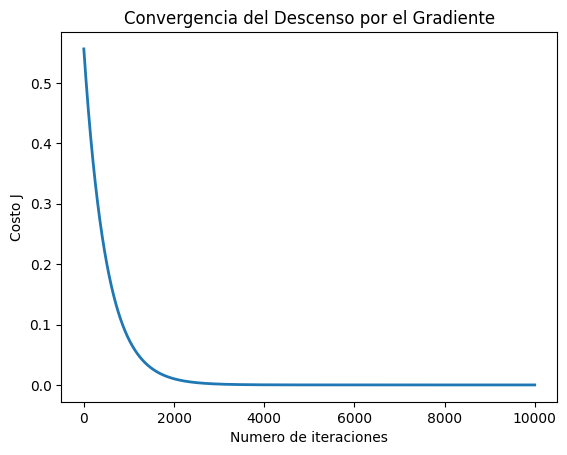

theta calculado por el descenso por el gradiente: [ 1.05552613e+00 -1.71809398e-02 -1.48290457e-04  8.67655506e-04
 -1.16210339e-05  6.39339514e-04  3.62906976e-04 -3.13303214e-03
  8.35404811e-04 -6.50085924e-04  2.61793568e-04 -5.08779225e-04
 -4.50321741e-04 -3.75574576e-04  9.63040642e-04]
Prueba de prediccion: Den = 1


In [148]:
# Elegir algun valor para alpha
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(15)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')
pyplot.title('Convergencia del Descenso por el Gradiente')
pyplot.show()

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))
X_array = [1,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1]
X_array[1:15] = (X_array[1:15] - mu) / sigma
Densidad = np.dot(X_array, theta)

print('Prueba de prediccion: Den = {:.0f}'.format(Densidad))

In [149]:
X_array = [1,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1]
X_array[1:15] = (X_array[1:15] - mu) / sigma

In [104]:
# imprimimos los datos normalizados de X_array
X_array[1:15]

[-0.8202461476510107,
 -1.7400732930029117,
 -0.8412458266913297,
 -0.6562047260805545,
 -0.738664698504443,
 -0.918047610722543,
 -0.6835332106410338,
 -0.7559288202758745,
 -0.07747885028009582,
 -0.5361314560050956,
 -0.7108256802212505,
 -0.09067592888923372,
 -0.6267182808852039,
 -1.2125411992734423]

ECUACION DE LA NORMAL

In [105]:
# Cargar datos
import pandas as pd
import numpy as np
data = pd.read_csv('/content/gdrive/MyDrive/bodyfat.csv', delimiter=',')

In [106]:
display(data)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [107]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
m = y.size

In [108]:
print(X.head())

   BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  


In [109]:
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [111]:
# Funcion de la ecuacion de la normal, obtenemos valores optimos
def normalEqn(X, y):
    theta = np.zeros(X.shape[1])
    theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)
    return theta

In [114]:
# Calcula los parametros con la ecuación de la normal
theta = normalEqn(X, y)

# Muestra los resultados obtenidos a partir de la aplicación de la ecuación de la normal
print('Theta calculado a partir de la ecuación de la normal: {:s}'.format(str(theta)))
X_array = [1,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1]
price = np.dot(X_array, theta)

print('Densidad predecido para una persona (usando la ecuación de la normal): den = {:.0f}'.format(price))

Theta calculado a partir de la ecuación de la normal: [ 1.09814633e+00 -2.21954247e-03  1.74382153e-05  4.32112085e-05
 -4.64369070e-06  3.06376944e-05  7.01838282e-05 -1.57402034e-04
  9.06335692e-05 -9.08373185e-05 -1.45223508e-05 -2.45248574e-04
 -1.72391330e-04 -1.35475763e-05  3.61663447e-04]
Densidad predecido para una persona (usando la ecuación de la normal): den = 1


REGRESION POLINOMIAL

In [115]:
# Cargar datos
data = pd.read_csv('/content/gdrive/MyDrive/bodyfat.csv', delimiter=",") # skiprows=1
data = data.drop(data.iloc[:,0:2].columns, axis=1)

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Age      252 non-null    int64  
 1   Weight   252 non-null    float64
 2   Height   252 non-null    float64
 3   Neck     252 non-null    float64
 4   Chest    252 non-null    float64
 5   Abdomen  252 non-null    float64
 6   Hip      252 non-null    float64
 7   Thigh    252 non-null    float64
 8   Knee     252 non-null    float64
 9   Ankle    252 non-null    float64
 10  Biceps   252 non-null    float64
 11  Forearm  252 non-null    float64
 12  Wrist    252 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 25.7 KB


In [117]:
X = data.iloc[:, 1:]
y = data.iloc[:, 0]
m = y.size

In [118]:
print(X)
print(y)
print(m)

     Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  Ankle  Biceps  \
0    154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   21.9    32.0   
1    173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   23.4    30.5   
2    154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   24.0    28.8   
3    184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   22.8    32.4   
4    184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   24.0    32.2   
..      ...     ...   ...    ...      ...    ...    ...   ...    ...     ...   
247  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   21.5    25.6   
248  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   23.2    35.2   
249  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   21.5    31.3   
250  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   22.7    30.5   
251  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   24.6    33.7   

     Forearm  Wrist  
0       27.4   17

In [119]:
X = np.concatenate([X, X * X], axis=1)

In [120]:
print(X)

[[ 154.25   67.75   36.2  ... 1024.    750.76  292.41]
 [ 173.25   72.25   38.5  ...  930.25  835.21  331.24]
 [ 154.     66.25   34.   ...  829.44  635.04  275.56]
 ...
 [ 186.75   66.     38.9  ...  979.69  739.84  324.  ]
 [ 190.75   70.5    38.9  ...  930.25  864.36  392.04]
 [ 207.5    70.     40.8  ... 1135.69  900.    436.81]]


In [121]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 252
Número de columnas: 24


In [123]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X_norm = (X - mu) / sigma

    return X_norm, mu, sigma

In [124]:
# llama featureNormalize con los datos cargados
X_norm, mu, sigma = featureNormalize(X)

print(X)
print('Media calculada:', mu)
print('Desviación estandar calculada:', sigma)
print(X_norm)

[[ 154.25   67.75   36.2  ... 1024.    750.76  292.41]
 [ 173.25   72.25   38.5  ...  930.25  835.21  331.24]
 [ 154.     66.25   34.   ...  829.44  635.04  275.56]
 ...
 [ 186.75   66.     38.9  ...  979.69  739.84  324.  ]
 [ 190.75   70.5    38.9  ...  930.25  864.36  392.04]
 [ 207.5    70.     40.8  ... 1135.69  900.    436.81]]
Media calculada: [1.78924405e+02 7.01488095e+01 3.79920635e+01 1.00824206e+02
 9.25559524e+01 9.99047619e+01 5.94059524e+01 3.85904762e+01
 2.31023810e+01 3.22734127e+01 2.86638889e+01 1.82297619e+01
 3.28742379e+04 4.93421875e+03 1.44928278e+03 1.02363115e+04
 8.68241766e+03 1.00320815e+04 3.55651980e+03 1.49501857e+03
 5.36581270e+02 1.05066504e+03 8.25685516e+02 3.33192341e+02]
Desviación estandar calculada: [2.93307901e+01 3.65558099e+00 2.42608520e+00 8.41373177e+00
 1.07616605e+01 7.14982914e+00 5.23952510e+00 2.40701450e+00
 1.69152717e+00 3.01527320e+00 2.01667787e+00 9.31730737e-01
 1.17084550e+04 4.47703203e+02 1.87977627e+02 1.74814153e+03
 2.09

In [125]:
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [126]:
print(X)

[[ 1.         -0.84124583 -0.65620473 ... -0.13487223 -0.6519512
  -1.19112028]
 [ 1.         -0.19346239  0.57478975 ... -0.60906134  0.08287562
  -0.05702157]
 [ 1.         -0.84976929 -1.06653622 ... -1.11896005 -1.65886844
  -1.68325427]
 ...
 [ 1.          0.26680479 -1.1349248  ... -0.35899297 -0.74696966
  -0.26847856]
 [ 1.          0.40318025  0.09606967 ... -0.60906134  0.33651922
   1.71874977]
 [ 1.          0.97425249 -0.04070749 ...  0.43005771  0.64663442
   3.02633666]]


In [128]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores utiles
    m = y.shape[0] # numero de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))

    return J


In [129]:
def gradientDescentPoly(X, y, theta, alpha, num_iters):

    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [130]:
num_filas, num_columnas = X.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 252
Número de columnas: 25


theta calculado por el descenso por el gradiente: [44.88289303 -2.41876276 -0.59806214  0.6874983   0.64490901  5.491902
 -1.97939158 -4.38860981  2.0371774  -1.37231466  0.27306516 -0.90252847
  2.71074692 -2.02889973 -1.72407072  0.45685474  0.47428072  4.92427571
 -1.9505534  -4.43698106  2.05906967 -0.10407199  0.3897767  -1.50134015
  2.43956934]
Densidad predecido para una persona (usando el descenso por el gradiente): den = 276


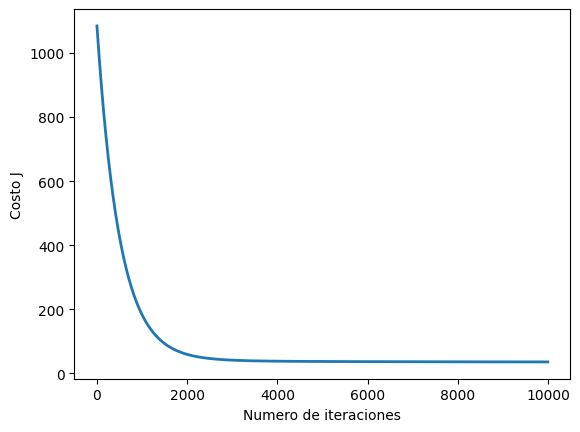

In [131]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.001
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(25)
theta, J_history = gradientDescentPoly(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

X_array = [1,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,151.29,529,23793.0625,4590.0625,1310.44,8667.61,
           7259.04,8930.25,3481,1391.29,479.61,1024]
X_array[1:25] = (X_array[1:25] - mu) / sigma
Densidad = np.dot(X_array, theta)

print('Densidad predecido para una persona (usando el descenso por el gradiente): den = {:.0f}'.format(Densidad))

In [132]:
X_array = [1,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,151.29,529,23793.0625,4590.0625,1310.44,8667.61,
           7259.04,8930.25,3481,1391.29,479.61,1024]
X_array[1:25] = (X_array[1:25] - mu) / sigma

In [133]:
X_array[1:25]
print(np.dot(X_array, theta))

276.31751994863544
